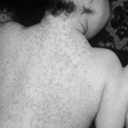

In [1]:
import pandas as pd
import numpy as np
from PIL import Image

img = Image.open('monkeypox-dataset/Monekypox_gray_augmented/monkeygray_aug00.jpg')

img


In [2]:
width, height = img.size
print("Dimensions:", width, height)

Dimensions: 128 128


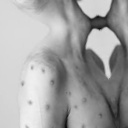

In [3]:
img2 = Image.open('monkeypox-dataset/Monekypox_gray_augmented/monkeygray_aug574.jpg')

img2

In [4]:
width, height = img2.size
print("Dimensions:", width, height)

Dimensions: 128 128


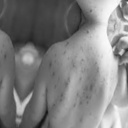

In [5]:
img3 = Image.open("monkeypox-dataset/Other/chicken_aug           1.jpg")

img3

In [6]:
width, height = img3.size
print("Dimensions:", width, height)

Dimensions: 128 128


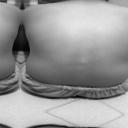

In [9]:
img4 = Image.open("monkeypox-dataset/Other/normalgray_aug         153.jpg")

img4

In [10]:
width, height = img4.size
print("Dimensions:", width, height)

Dimensions: 128 128


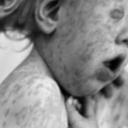

In [11]:
img5 = Image.open("monkeypox-dataset/Other/measlesgray_aug220.jpg")

img5

In [12]:
width, height = img5.size
print("Dimensions:", width, height)

Dimensions: 128 128


In [13]:
import os
import shutil

# Define the source directory and the destination directories for train and test sets
source_dir = 'monkeypox-dataset/Monekypox_gray_augmented/'
train_dir = 'monkeypox-dataset/train/'
test_dir = 'monkeypox-dataset/test/'

# Create the destination directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get the list of all image files in the source directory
all_images = sorted([f for f in os.listdir(source_dir) if f.endswith('.jpg')])

# Split the images into train and test sets
train_images = all_images[:410]
test_images = all_images[410:587]

# Copy the images to the respective directories
for img in train_images:
    shutil.copy(os.path.join(source_dir, img), os.path.join(train_dir, img))

for img in test_images:
    shutil.copy(os.path.join(source_dir, img), os.path.join(test_dir, img))

print(f"Train images: {len(train_images)}")
print(f"Test images: {len(test_images)}")

Train images: 410
Test images: 177


In [14]:
# Define the source directory for the "Other" images
source_other_dir = 'monkeypox-dataset/Other/'

# Get the list of all image files in the "Other" source directory
all_other_images = sorted([f for f in os.listdir(source_other_dir) if f.endswith('.jpg')])

# Split the "Other" images into train and test sets
train_other_images = all_other_images[:816]
test_other_images = all_other_images[816:1167]

# Create the destination directories for "Other" images if they don't exist
train_other_dir = 'monkeypox-dataset/train_other/'
test_other_dir = 'monkeypox-dataset/test_other/'

os.makedirs(train_other_dir, exist_ok=True)
os.makedirs(test_other_dir, exist_ok=True)

# Copy the "Other" images to the respective directories
for img in train_other_images:
    shutil.copy(os.path.join(source_other_dir, img), os.path.join(train_other_dir, img))

for img in test_other_images:
    shutil.copy(os.path.join(source_other_dir, img), os.path.join(test_other_dir, img))

print(f"Train 'Other' images: {len(train_other_images)}")
print(f"Test 'Other' images: {len(test_other_images)}")

Train 'Other' images: 816
Test 'Other' images: 351


In [15]:
import random

# Seed the random number generator for reproducibility
random.seed(42)

# Define the categories
categories = ['normal', 'chicken', 'measles']

# Create dictionaries to hold the images for each category
category_images = {category: [] for category in categories}

# Populate the dictionaries with the corresponding images
for img in all_other_images:
    for category in categories:
        if category in img:
            category_images[category].append(img)
            break

# Split the images for each category into train and test sets
train_other_images = []
test_other_images = []

for category, images in category_images.items():
    random.shuffle(images)
    split_index = int(len(images) * 0.7)
    train_other_images.extend(images[:split_index])
    test_other_images.extend(images[split_index:])

# Copy the "Other" images to the respective directories
for img in train_other_images:
    shutil.copy(os.path.join(source_other_dir, img), os.path.join(train_other_dir, img))

for img in test_other_images:
    shutil.copy(os.path.join(source_other_dir, img), os.path.join(test_other_dir, img))

print(f"Train 'Other' images: {len(train_other_images)}")
print(f"Test 'Other' images: {len(test_other_images)}")

Train 'Other' images: 816
Test 'Other' images: 351


In [16]:
# Define the new directory for the "Other" images
new_adat_dir = 'monkeypox-dataset/new_adat/'
new_train_other_dir = os.path.join(new_adat_dir, 'train_other/')
new_test_other_dir = os.path.join(new_adat_dir, 'test_other/')

# Create the new directories if they don't exist
os.makedirs(new_train_other_dir, exist_ok=True)
os.makedirs(new_test_other_dir, exist_ok=True)

# Copy the "Other" images to the new directories
for img in train_other_images:
    shutil.copy(os.path.join(source_other_dir, img), os.path.join(new_train_other_dir, img))

for img in test_other_images:
    shutil.copy(os.path.join(source_other_dir, img), os.path.join(new_test_other_dir, img))

print(f"New train 'Other' images: {len(train_other_images)}")
print(f"New test 'Other' images: {len(test_other_images)}")

New train 'Other' images: 816
New test 'Other' images: 351
